In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 7)

Populating the interactive namespace from numpy and matplotlib


In [26]:
data = pd.read_csv("../dataAnalysis/searchLog.csv")
data.drop_duplicates(inplace = True)
data.rename(columns=lambda x: x.strip(),inplace=True)
data.head()

,Algorithm,Heuristic,Problem,Nodes explored,Arcs Revised,Variables in problem,Constraints in problem
0,Backtracking,None,10Queens,975,0,10,45
1,Forward Checking,Smallest Domain,10Queens,292,517,10,45
2,Forward Checking,Name,10Queens,150,215,10,45
3,Forward Checking,Random,10Queens,12,40,10,45
4,Forward Checking,MaxDegree,10Queens,12,40,10,45


In [28]:
data['Branch Per Constraint'] = data['Nodes explored']/data['Constraints in problem']
data['Branch Per Variable'] = data['Nodes explored']/data['Variables in problem']

In [42]:
data.head()


,Algorithm,Heuristic,Problem,Nodes explored,Arcs Revised,Variables in problem,Constraints in problem,Branch Per Constraint,Branch Per Variable
0,Backtracking,None,10Queens,975,0,10,45,21.666667,97.5
1,Forward Checking,Smallest Domain,10Queens,292,517,10,45,6.488889,29.2
2,Forward Checking,Name,10Queens,150,215,10,45,3.333333,15.0
3,Forward Checking,Random,10Queens,12,40,10,45,0.266667,1.2
4,Forward Checking,MaxDegree,10Queens,12,40,10,45,0.266667,1.2


C:\Users\Daniel\Anaconda3\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


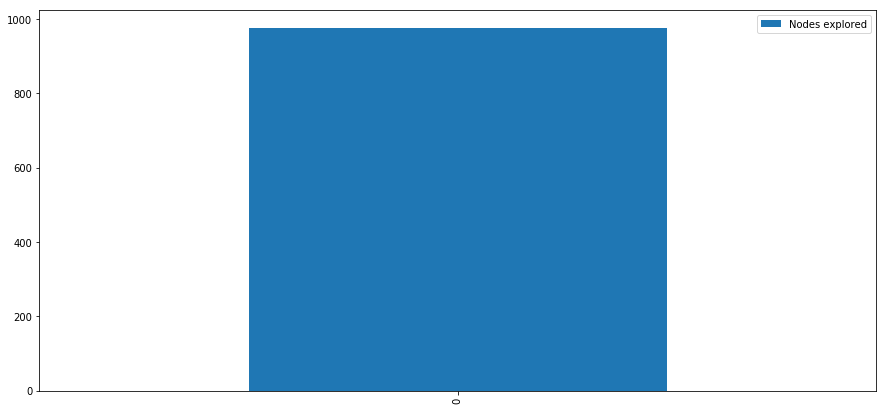

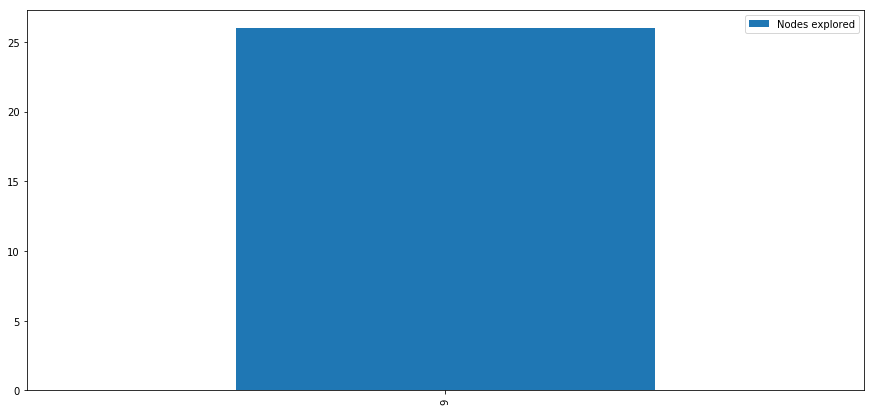

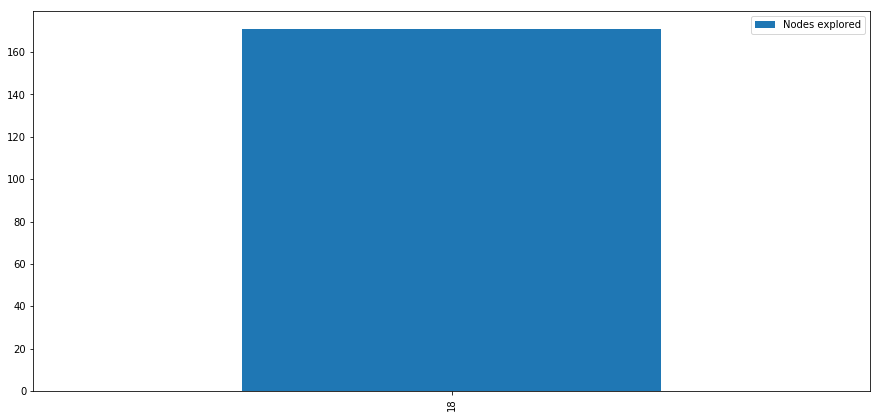

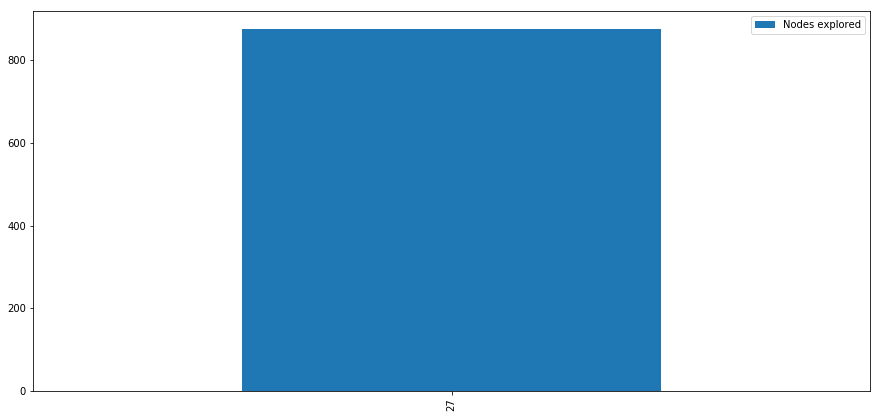

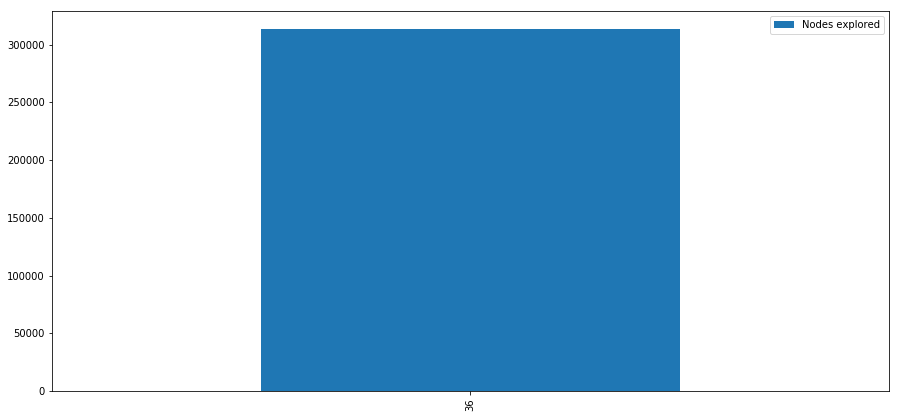

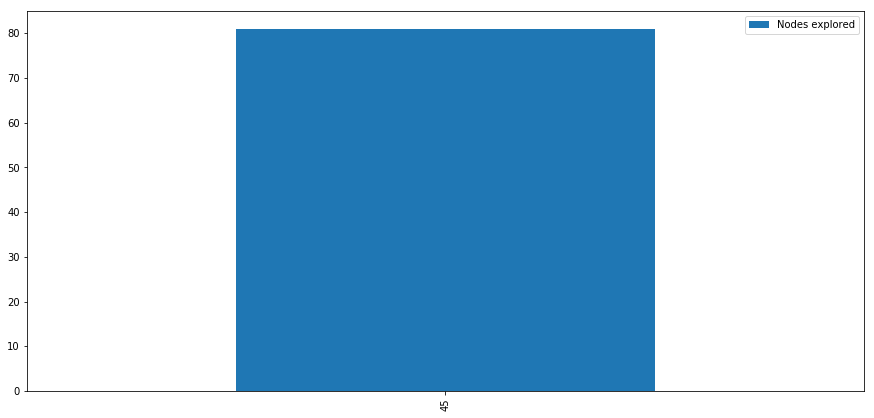

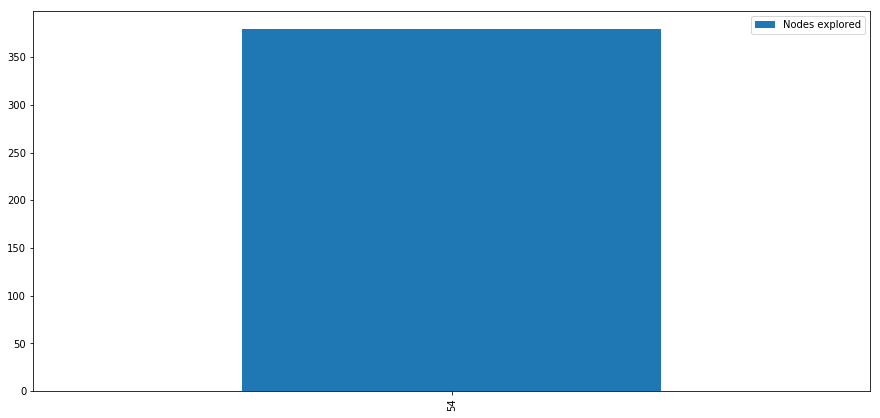

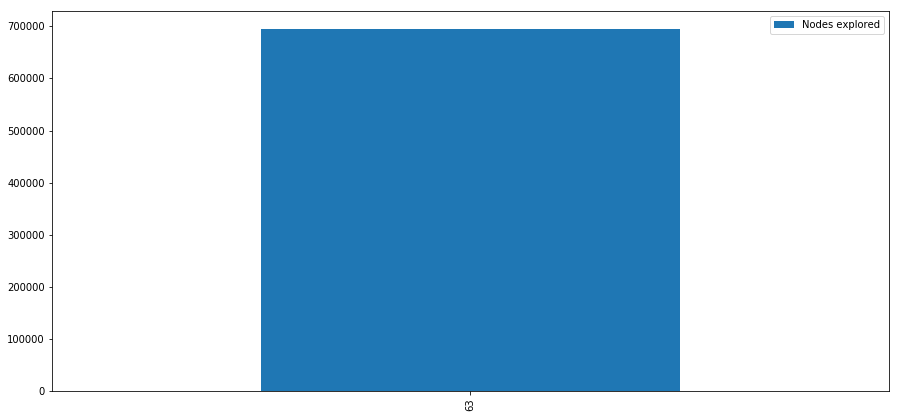

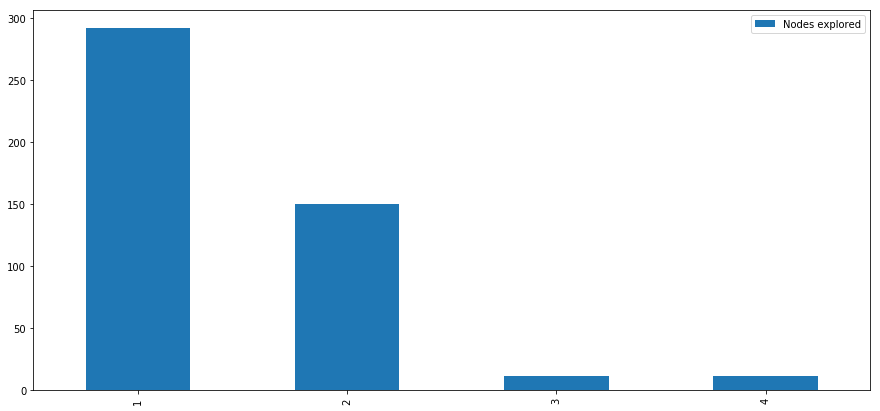

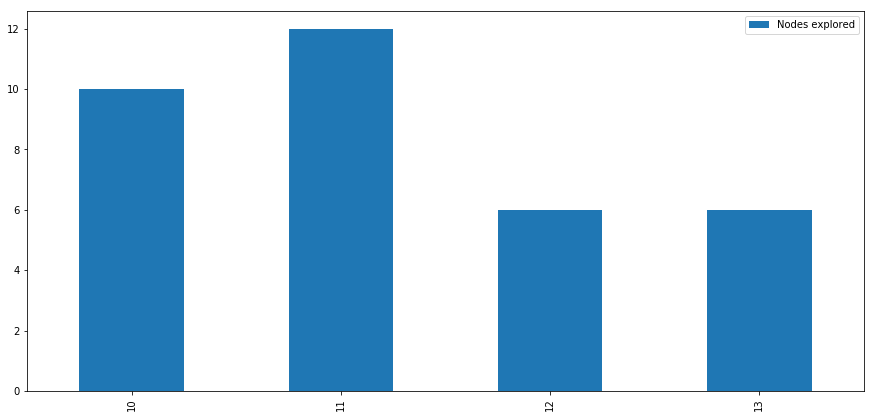

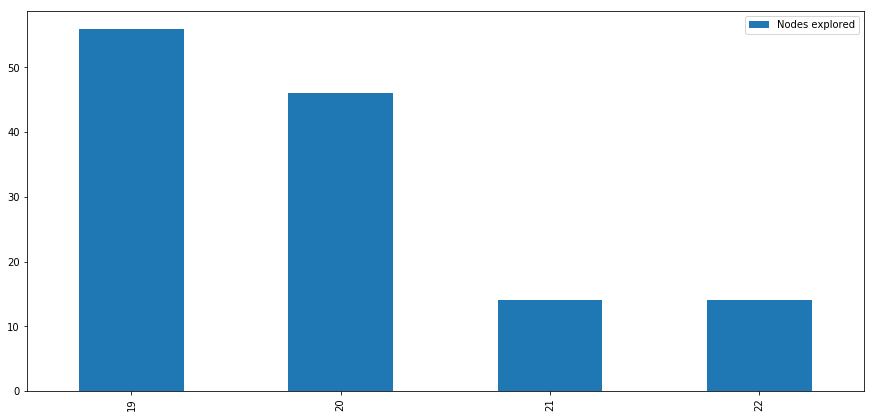

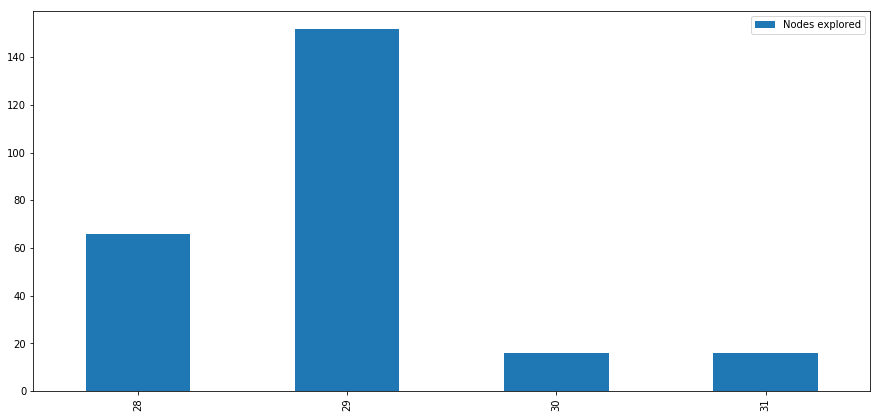

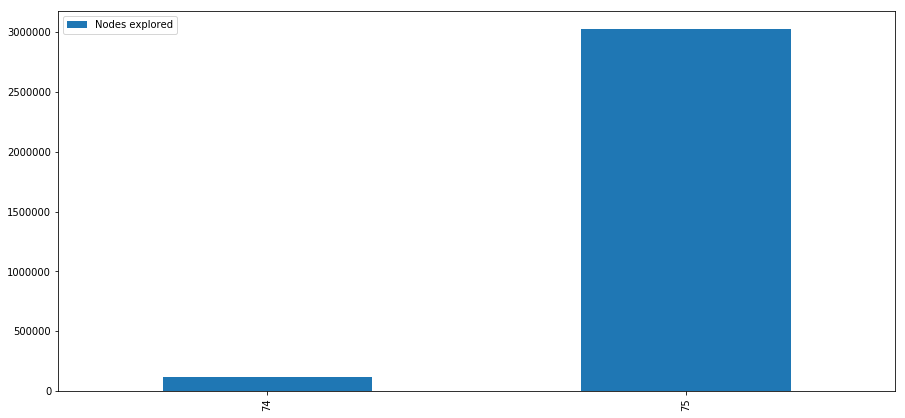

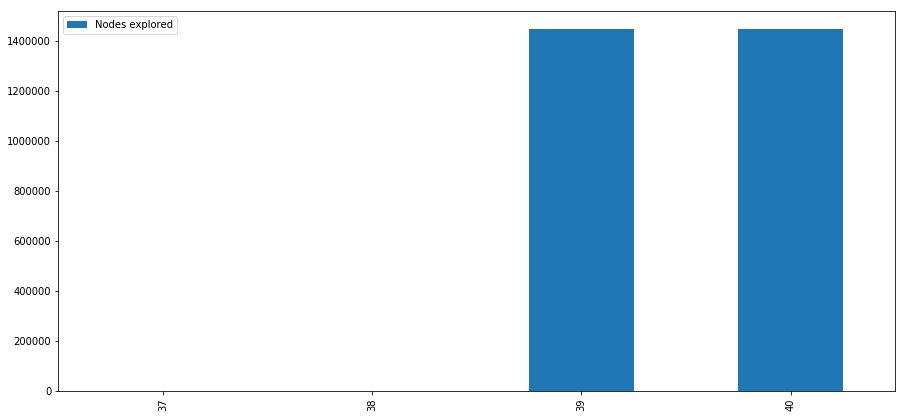

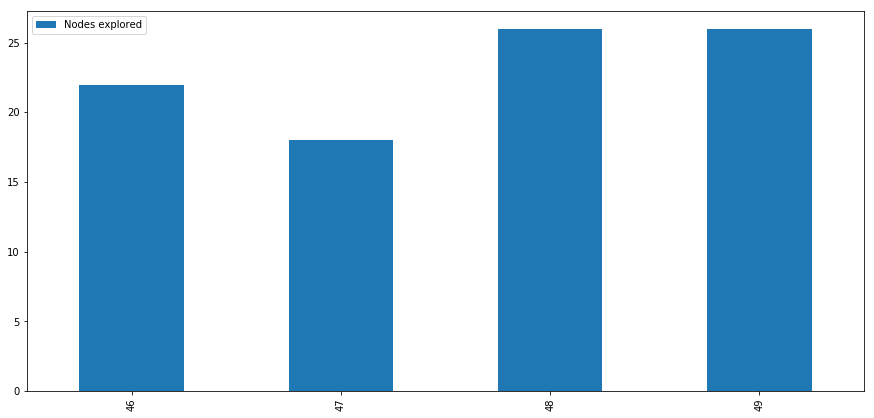

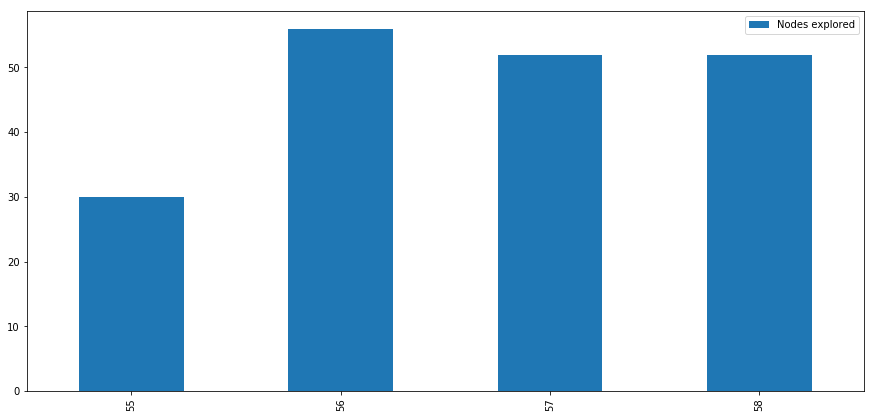

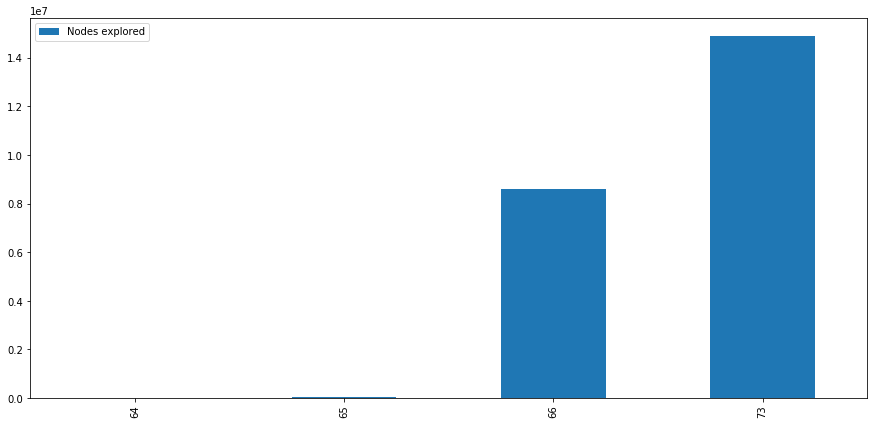

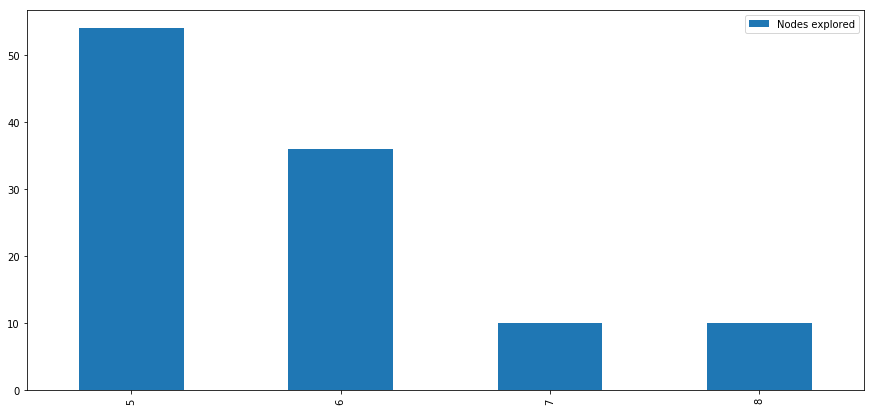

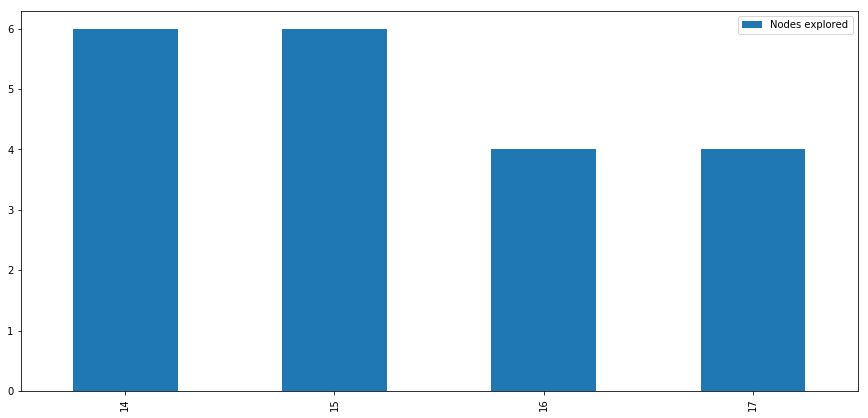

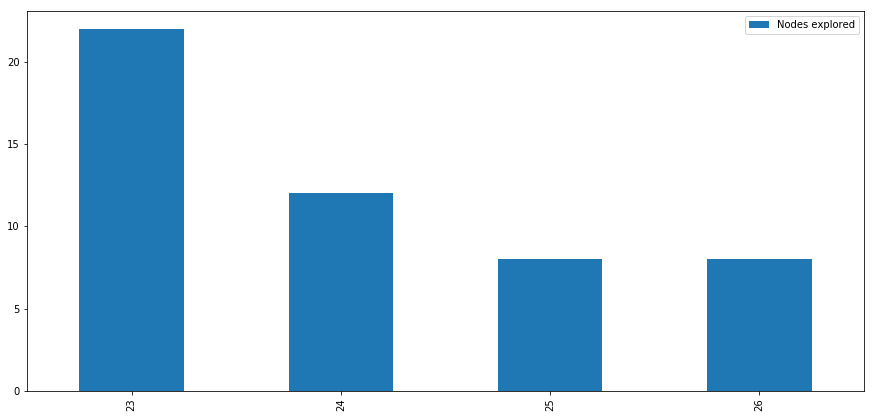

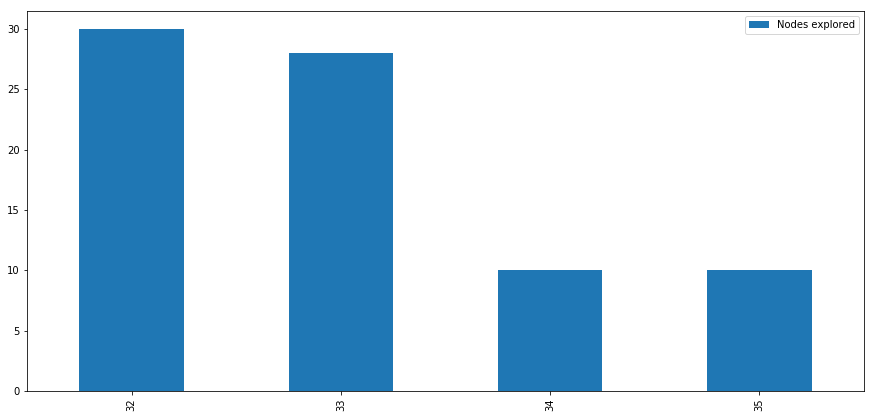

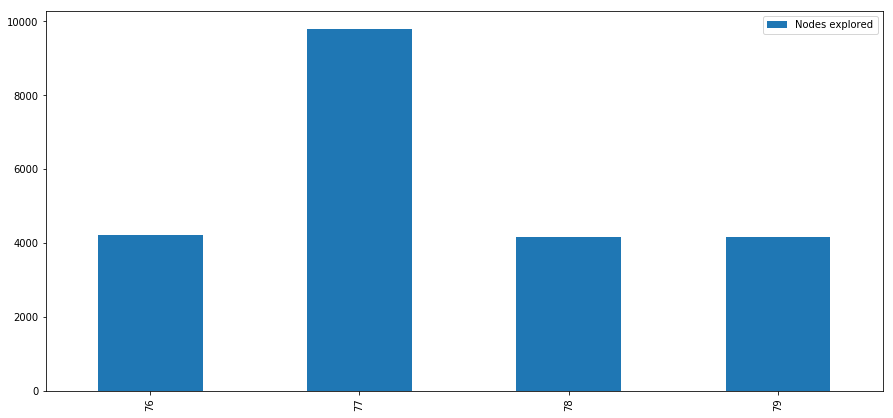

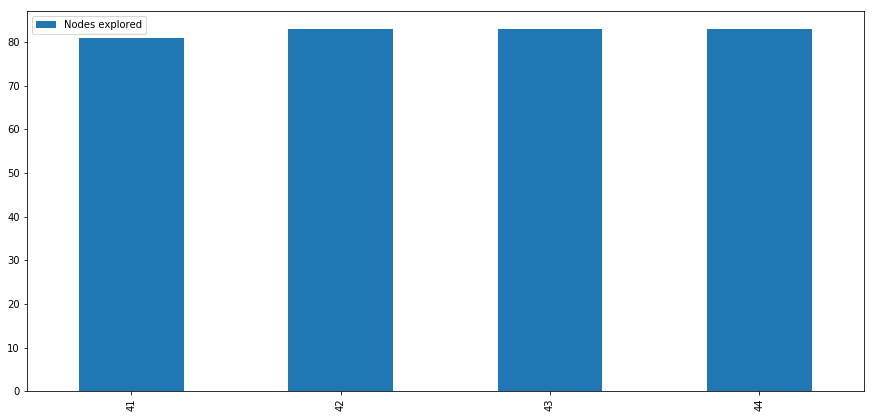

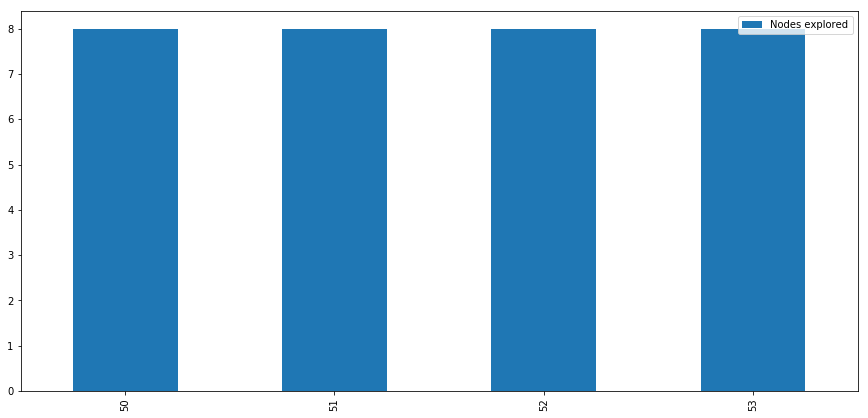

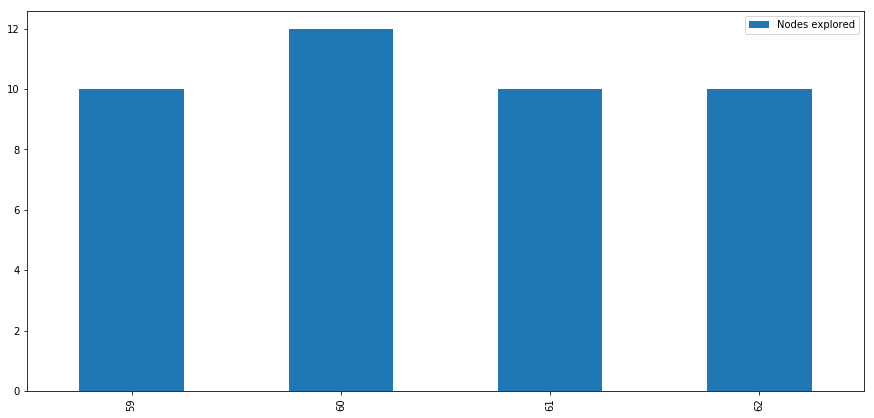

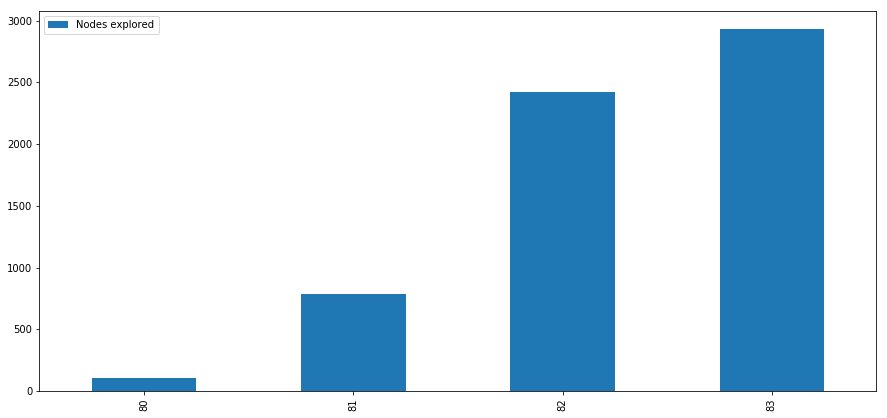

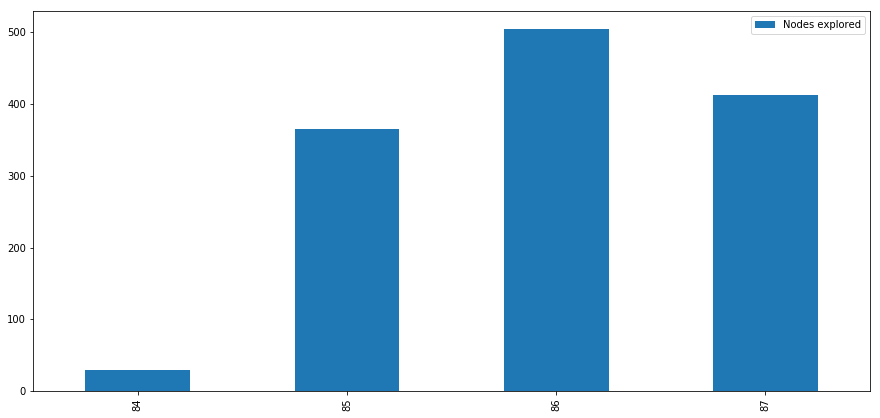

In [71]:
for key,grp in data.groupby(['Algorithm','Problem']):
   grp.loc[:,['Problem','Nodes explored']].plot(kind='bar')

ValueError: could not convert string to float: ' 4Queens'

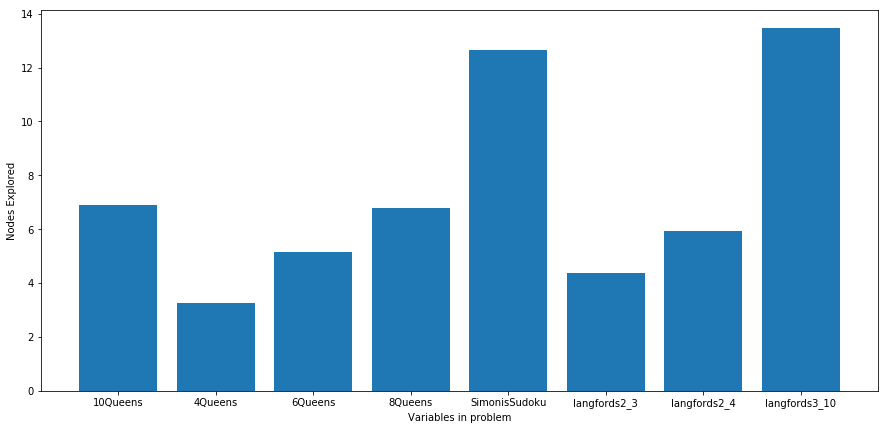

In [59]:
#Taken from https://stackoverflow.com/questions/15465645/plotting-results-of-pandas-groupby#15466103
for key, grp in data.sort_values(['Variables in problem','Constraints in problem']).groupby(['Algorithm']):
    label =key
    plt.(grp['Problem'],grp['Nodes explored'].apply(np.log), label = label)
    plt.xlabel('Variables in problem')
#     plt.xticks(range(data['Variables in problem'].min(),data['Variables in problem'].max()+1),5)
    plt.ylabel('Nodes Explored')
plt.legend(loc='best')

plt.grid(True, which="both")
plt.show()

# data.groupby('Algorithm').plot(x='Variables in problem',y='Nodes explored')

In [40]:
#Taken from https://stackoverflow.com/questions/15465645/plotting-results-of-pandas-groupby#15466103
for key, grp in data.sort_values(['Constraints in problem','Variables in problem']).groupby(['Algorithm']).agg({'Arcs Revised':'min'}):
    label =key
    plt.semilogy(grp['Constraints in problem'],grp['Arcs Revised'], label = label)
    plt.xlabel('Constraints in problem')
#     plt.xticks(range(data['Variables in problem'].min(),data['Variables in problem'].max()+1),5)
    plt.ylabel('Arcs Revised')
plt.legend(loc='best')

plt.grid(True, which="both")
plt.show()

# data.groupby('Algorithm').plot(x='Variables in problem',y='Nodes explored')

ValueError: too many values to unpack (expected 2)

In [ ]:
data[]